### Dependencies

In [1]:
#Importing dependencies
import pandas as pd
import folium
import requests
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

### Data Collection

In [2]:
#Gathering Data
df_chn=pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai')[1]
df_mum=pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[0]

In [3]:
df_chn.head()

,Area,Location,Latitude,Longitude
0,Adambakkam,South and East Chennai,12.9880,80.2047
1,Adyar,South and East Chennai,13.0012,80.2565
2,Alandur,South and East Chennai,12.9975,80.2006
3,Alapakkam,West Chennai,13.0490,80.1673
4,Alwarthirunagar,West Chennai,13.0426,80.1840


In [4]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       176 non-null    object 
 1   Location   176 non-null    object 
 2   Latitude   176 non-null    float64
 3   Longitude  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.6+ KB


In [5]:
df_mum.head()

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


In [6]:
df_mum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       93 non-null     object 
 1   Location   93 non-null     object 
 2   Latitude   93 non-null     float64
 3   Longitude  93 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


<AxesSubplot:>

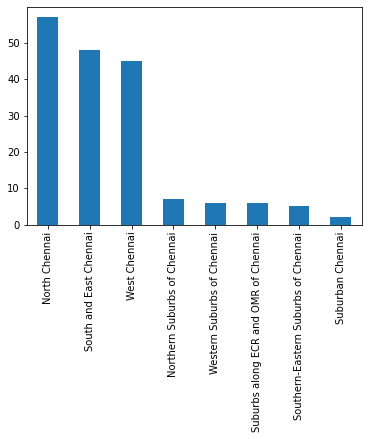

In [7]:
#Visual observation
df_dense_chn=df_chn['Location'].value_counts()
df_dense_chn.plot.bar()

<AxesSubplot:>

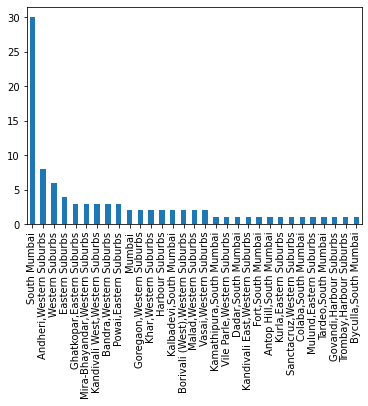

In [8]:
df_dense_mum=df_mum['Location'].value_counts()
df_dense_mum.plot.bar()

In [9]:

#Visual of Chennai area distrubution
map_chn = folium.Map(location=[13.08784 , 80.27847], zoom_start=10)

for lat, lng, Location, Area in zip(df_chn['Latitude'], df_chn['Longitude'], df_chn['Location'], df_chn['Area']):
    label = '{}, {}'.format(Area, Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chn)
map_chn

In [52]:
#Visual of Mumbai area distrubution
map_mum = folium.Map(location=[19.076090, 72.877426], zoom_start=10)

for lat, lng, Location, Area in zip(df_mum['Latitude'], df_mum['Longitude'], df_mum['Location'], df_mum['Area']):
    label = '{}, {}'.format(Area, Location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)
map_mum

In [11]:
### Gathering venue data from FourSquare

CLIENT_ID = 'CGXA55OC1GAJ3TOA3OFNUZ15V3RTEL4FHZTADZUT3SMQB5KK' # your Foursquare ID
CLIENT_SECRET = 'GKPAU14JZKXAX4R5WZTB1MX5QNOHSAHGUHMHE1F3VGWOE2S2' # your Foursquare Secret
ACCESS_TOKEN = 'GUK5PW0AZIDXWYN0PABB3ONMT5LTIXABXREXSSFDLW1X0A1Z' # your FourSquare Access Token
VERSION = '20210614'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: CGXA55OC1GAJ3TOA3OFNUZ15V3RTEL4FHZTADZUT3SMQB5KK
CLIENT_SECRET:GKPAU14JZKXAX4R5WZTB1MX5QNOHSAHGUHMHE1F3VGWOE2S2


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
venues_in_chn = getNearbyVenues(df_chn['Area'], df_chn['Latitude'], df_chn['Longitude'])

Adambakkam
Adyar
Alandur
Alapakkam
Alwarthirunagar
Ambattur
Aminjikarai
Anna Nagar
Annanur
Arumbakkam
Ashok Nagar
Avadi
Ayappakkam
Basin Bridge
Besant Nagar
Broadway
Central
Chetpet
Choolai
MMDA Colony
Defence Colony
Egmore
Ennore
Erukanchery
George Town
Gerugambakkam
Gopalapuram
Guindy
Hastinapuram
ICF Colony
Injambakkam
Irumbuliyur
Iyyapanthangal
Jamalia
K.K. Nagar
Kadaperi
Kallikuppam
Karambakkam
Kathirvedu
Kathivakkam
Keelkattalai
Kodungaiyur
Kolappakkam
Kolathur
Korattur
Korukkupet
Kosapet
Kottivakkam
Kovilambakkam
Koyambedu
Kundrathur
Lakshmipuram
M.G.R. Garden
M.G.R. Nagar
M.K.B. Nagar
Madhavaram
Madhavaram Milk Colony
Madipakkam
Maduravoyal
Mambakkam
Manali
Manali New Town
manapakkam
Mangadu
Manjambakkam
Mannadi
Mathur MMDA
Medavakkam
Minjur
Mogappair
Moolakadai
Mowlivakkam
Mudichur
Mugalivakkam
Mylapore
Nagalkeni
Nandambakkam
Nanganallur
Naravarikuppam
Neelankarai
Nerkundrum
Nesapakkam
New Washermenpet
Nolambur
Old Washermenpet
Oragadam
Otteri
Padi
Palavakkam
Pallavaram
Pallik

In [14]:
venues_in_mum = getNearbyVenues(df_mum['Area'], df_mum['Latitude'], df_mum['Longitude'])

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


In [15]:
venues_in_chn.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Adambakkam,12.988,80.2047,Venkateshwara Super Market,Department Store
1,Adambakkam,12.988,80.2047,Ibaco,Dessert Shop
2,Adambakkam,12.988,80.2047,Deepam Restaurant,Indian Restaurant
3,Adambakkam,12.988,80.2047,Kings Gym Unisex Fitness Centre,Gym
4,Adambakkam,12.988,80.2047,ibaco Adambakkam,Ice Cream Shop


In [16]:
venues_in_mum.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Amboli,19.1293,72.8434,Cafe Arfa,Indian Restaurant
1,Amboli,19.1293,72.8434,"5 Spice , Bandra",Chinese Restaurant
2,Amboli,19.1293,72.8434,Subway,Sandwich Place
3,Amboli,19.1293,72.8434,Cafe Coffee Day,Coffee Shop
4,Amboli,19.1293,72.8434,Gelato Italiano,Ice Cream Shop


### Data Treatment

In [17]:
#Grouping by Venue Categories
venues_in_chn.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
ATM,Thirumullaivoyal north,13.2989,80.3203,HDFC Bank ATM
Afghan Restaurant,Pallavaram,13.0969,80.2865,Yaa Mohaideen Briyani
African Restaurant,Gopalapuram,13.0489,80.2586,Nando's
American Restaurant,Neelankarai,13.0850,80.2547,Tryst Cafe (Baker Street)
Antique Shop,Koyambedu,13.0694,80.1948,koyambedu fruit market
...,...,...,...,...
Travel & Transport,Karambakkam,13.0376,80.1532,Porur Signal
Vegetarian / Vegan Restaurant,Velachery,19.2274,80.2872,Veg Sizzles
Video Store,Parry's Corner,13.0928,80.2893,Burma Bazaar


In [18]:
venues_in_mum.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
ATM,Kanjurmarg,19.130000,72.940000,Axis Bank ATM
Accessories Store,Lokhandwala,19.130815,72.829270,Manish Market
Advertising Agency,Lower Parel,18.995278,72.830000,Stories HQ 3.0
Afghan Restaurant,Amrut Nagar,19.102077,72.912835,Zaffran
American Restaurant,Sunder Nagar,19.175000,72.912835,Thank God It's Friday
...,...,...,...,...
Waterfront,Marine Lines,18.944700,72.824400,Marine Drive
Whisky Bar,Parel,18.990000,72.844076,Best Punjab
Wine Bar,Nariman Point,18.930000,72.823000,Opium Den


In [19]:
#One Hot Encoding
chn_venues = pd.get_dummies(venues_in_chn[['Venue Category']], prefix="", prefix_sep="")
chn_venues

,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,...,Theater,Theme Park,Tourist Information Center,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
mum_venues = pd.get_dummies(venues_in_mum[['Venue Category']], prefix="", prefix_sep="")
mum_venues

,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Tea Room,Theater,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Adding Neighbourhood Namaes

chn_venues['Neighbourhood'] = venues_in_chn['Neighbourhood'] 
# moving neighborhood column to the first column
fixed_columns = [chn_venues.columns[-1]] + list(chn_venues.columns[:-1])
chn_venues = chn_venues[fixed_columns]
chn_venues.head()

,Neighbourhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Astrologer,...,Theater,Theme Park,Tourist Information Center,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
mum_venues['Neighbourhood'] = venues_in_mum['Neighbourhood'] 
# moving neighborhood column to the first column
fixed_columns = [mum_venues.columns[-1]] + list(mum_venues.columns[:-1])
mum_venues = mum_venues[fixed_columns]
mum_venues.head()

,Neighbourhood,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,...,Tea Room,Theater,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Venue categories mean value

chn_ven_group = chn_venues.groupby('Neighbourhood').mean().reset_index()
chn_ven_group.head()

,Neighbourhood,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Astrologer,...,Theater,Theme Park,Tourist Information Center,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Alwarthirunagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [24]:
mum_ven_group = mum_venues.groupby('Neighbourhood').mean().reset_index()
mum_ven_group.head()

,Neighbourhood,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,...,Tea Room,Theater,Tourist Information Center,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Aarey Milk Colony,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agripada,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Altamount Road,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Amboli,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Amrut Nagar,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#op most common venue categories

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#label columns of venue 
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [27]:
#Top venue groups

# create a new dataframe for Chennai
neighborhoods_venues_sorted_chn = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_chn['Neighbourhood'] = chn_ven_group['Neighbourhood']

for ind in np.arange(chn_ven_group.shape[0]):
    neighborhoods_venues_sorted_chn.iloc[ind, 1:] = return_most_common_venues(chn_ven_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_chn.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Department Store,Dessert Shop,Gym,Indian Restaurant,Ice Cream Shop,Park,North Indian Restaurant,Office,Optical Shop,Organic Grocery
1,Adyar,Indian Restaurant,Café,Pizza Place,Electronics Store,Food Court,Bakery,Middle Eastern Restaurant,Sandwich Place,Asian Restaurant,South Indian Restaurant
2,Alandur,Train Station,Indian Restaurant,Breakfast Spot,Kebab Restaurant,Metro Station,Park,Music Store,Nightclub,North Indian Restaurant,Office
3,Alapakkam,Fast Food Restaurant,Snack Place,Indian Restaurant,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
4,Alwarthirunagar,Fast Food Restaurant,Juice Bar,Gym,Café,Ice Cream Shop,Clothing Store,Pizza Place,Pharmacy,Photography Studio,Pet Store


In [28]:
# create a new dataframe for Mumbai
neighborhoods_venues_sorted_mum = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_mum['Neighbourhood'] = mum_ven_group['Neighbourhood']

for ind in np.arange(mum_ven_group.shape[0]):
    neighborhoods_venues_sorted_mum.iloc[ind, 1:] = return_most_common_venues(mum_ven_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_mum.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarey Milk Colony,Snack Place,ATM,Multiplex,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant
1,Agripada,Indian Restaurant,Cupcake Shop,Coffee Shop,Gym,ATM,Music Venue,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
2,Altamount Road,Café,Indian Restaurant,Sandwich Place,Coffee Shop,Theater,Bakery,Fast Food Restaurant,ATM,Multiplex,Monument / Landmark
3,Amboli,Ice Cream Shop,Indian Restaurant,Sandwich Place,Halal Restaurant,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Music Store,Monument / Landmark,Movie Theater
4,Amrut Nagar,Café,Indian Restaurant,Restaurant,Fast Food Restaurant,Sandwich Place,Multiplex,Chinese Restaurant,Diner,Shopping Mall,Bookstore


### Data Modelling

In [29]:
# set number of clusters
k_num_clusters = 5

In [30]:
chn_group_clustering = chn_ven_group.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_chn = KMeans(n_clusters=k_num_clusters, random_state=0).fit(chn_group_clustering)
kmeans_chn

KMeans(n_clusters=5, random_state=0)

In [31]:
mum_group_clustering = mum_ven_group.drop('Neighbourhood', 1)

# run k-means clustering
kmeans_mum = KMeans(n_clusters=k_num_clusters, random_state=0).fit(mum_group_clustering)
kmeans_mum

KMeans(n_clusters=5, random_state=0)

In [32]:
kmeans_chn.labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 1, 2, 2, 4, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 3, 4,
       3, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       4, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 4, 2, 2, 1,
       4, 2, 2, 2, 2, 3, 2, 1, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2])

In [33]:
kmeans_mum.labels_

array([2, 3, 0, 3, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0])

In [34]:
neighborhoods_venues_sorted_chn.insert(0, 'Cluster Labels', kmeans_chn.labels_ +1)

In [35]:
neighborhoods_venues_sorted_mum.insert(0, 'Cluster Labels', kmeans_mum.labels_ +1)

In [36]:
chn_data = df_chn
chn_data = chn_data.join(neighborhoods_venues_sorted_chn.set_index('Neighbourhood'), on='Area')
chn_data.head()

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,South and East Chennai,12.9880,80.2047,3.0,Department Store,Dessert Shop,Gym,Indian Restaurant,Ice Cream Shop,Park,North Indian Restaurant,Office,Optical Shop,Organic Grocery
1,Adyar,South and East Chennai,13.0012,80.2565,3.0,Indian Restaurant,Café,Pizza Place,Electronics Store,Food Court,Bakery,Middle Eastern Restaurant,Sandwich Place,Asian Restaurant,South Indian Restaurant
2,Alandur,South and East Chennai,12.9975,80.2006,3.0,Train Station,Indian Restaurant,Breakfast Spot,Kebab Restaurant,Metro Station,Park,Music Store,Nightclub,North Indian Restaurant,Office
3,Alapakkam,West Chennai,13.0490,80.1673,1.0,Fast Food Restaurant,Snack Place,Indian Restaurant,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
4,Alwarthirunagar,West Chennai,13.0426,80.1840,3.0,Fast Food Restaurant,Juice Bar,Gym,Café,Ice Cream Shop,Clothing Store,Pizza Place,Pharmacy,Photography Studio,Pet Store


In [37]:
mum_data = df_mum
mum_data = mum_data.join(neighborhoods_venues_sorted_mum.set_index('Neighbourhood'), on='Area')
mum_data.head()

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,4.0,Ice Cream Shop,Indian Restaurant,Sandwich Place,Halal Restaurant,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Music Store,Monument / Landmark,Movie Theater
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,1.0,Hotel,Restaurant,Cocktail Bar,Movie Theater,Salon / Barbershop,Café,Fast Food Restaurant,Multiplex,Punjabi Restaurant,Asian Restaurant
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,1.0,Pizza Place,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Arts & Entertainment,Cocktail Bar,Music Store,Mobile Phone Shop,Monument / Landmark
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,1.0,Market,Pizza Place,Sports Club,Juice Bar,Gym,Arts & Entertainment,Electronics Store,Fish Market,Vegetarian / Vegan Restaurant,Accessories Store
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,1.0,Ice Cream Shop,Concert Hall,Market,Residential Building (Apartment / Condo),Lounge,Liquor Store,Pub,Coffee Shop,Cocktail Bar,Accessories Store


In [38]:
chn_data_nonan = chn_data.dropna(subset=['Cluster Labels'])
mum_data_nonan = mum_data.dropna(subset=['Cluster Labels'])

### Data Visualization

In [51]:
#Chennai Clusters
map_clusters_chn = folium.Map(location=[13.08784 , 80.27847], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chn_data_nonan['Latitude'], chn_data_nonan['Longitude'], chn_data_nonan['Area'], chn_data_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters_chn)
        
map_clusters_chn

In [40]:
#Mumbai Clusters
map_clusters_mum = folium.Map(location=[19.076090, 72.877426], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mum_data_nonan['Latitude'], mum_data_nonan['Longitude'], mum_data_nonan['Area'], mum_data_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters_mum)
        
map_clusters_mum

In [41]:
#Chennaoi Cluster 1
chn_data_nonan.loc[chn_data_nonan['Cluster Labels'] == 1, chn_data_nonan.columns[[1] + list(range(5, chn_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,West Chennai,Fast Food Restaurant,Snack Place,Indian Restaurant,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
18,North Chennai,Fast Food Restaurant,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,ATM
95,North Chennai,Fast Food Restaurant,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,ATM
120,North Chennai,Fast Food Restaurant,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,ATM


In [42]:
#Mumbai Cluster 1
mum_data_nonan.loc[mum_data_nonan['Cluster Labels'] == 1, mum_data_nonan.columns[[1] + list(range(5, mum_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Western Suburbs,Hotel,Restaurant,Cocktail Bar,Movie Theater,Salon / Barbershop,Café,Fast Food Restaurant,Multiplex,Punjabi Restaurant,Asian Restaurant
2,"Andheri,Western Suburbs",Pizza Place,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Arts & Entertainment,Cocktail Bar,Music Store,Mobile Phone Shop,Monument / Landmark
3,"Andheri,Western Suburbs",Market,Pizza Place,Sports Club,Juice Bar,Gym,Arts & Entertainment,Electronics Store,Fish Market,Vegetarian / Vegan Restaurant,Accessories Store
4,"Andheri,Western Suburbs",Ice Cream Shop,Concert Hall,Market,Residential Building (Apartment / Condo),Lounge,Liquor Store,Pub,Coffee Shop,Cocktail Bar,Accessories Store
7,"Andheri,Western Suburbs",Ice Cream Shop,Pub,Chinese Restaurant,Café,Seafood Restaurant,Bar,Indian Restaurant,South Indian Restaurant,Dim Sum Restaurant,Pizza Place
9,"Mira-Bhayandar,Western Suburbs",Pizza Place,Chinese Restaurant,Music Venue,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex
10,"Mira-Bhayandar,Western Suburbs",Shipping Store,ATM,Multiplex,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant
12,"Bandra,Western Suburbs",Scenic Lookout,Indian Restaurant,Gym,Fast Food Restaurant,Cocktail Bar,Chinese Restaurant,Café,Food Truck,Boutique,Beach
13,"Bandra,Western Suburbs",Indian Restaurant,Bakery,Snack Place,Gourmet Shop,Pizza Place,Café,Chinese Restaurant,Pub,Mediterranean Restaurant,College Auditorium
14,"Bandra,Western Suburbs",Cupcake Shop,Bakery,Fast Food Restaurant,Dessert Shop,BBQ Joint,Café,Sandwich Place,Salon / Barbershop,Convenience Store,Deli / Bodega


In [43]:
#Chennaoi Cluster 2
chn_data_nonan.loc[chn_data_nonan['Cluster Labels'] == 2, chn_data_nonan.columns[[1] + list(range(5, chn_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,West Chennai,Department Store,Event Space,Hotel,Chinese Restaurant,Pub,Platform,Pizza Place,Photography Studio,Pharmacy,Pet Store
28,South and East Chennai,Department Store,Food & Drink Shop,Tailor Shop,Café,Music Store,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
33,North Chennai,Department Store,Dog Run,Clothing Store,Performing Arts Venue,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park
46,North Chennai,Department Store,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,ATM
49,West Chennai,Department Store,Flower Shop,Antique Shop,Bus Station,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park
54,North Chennai,Department Store,Bus Station,Tailor Shop,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
86,North Chennai,Department Store,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,ATM
87,West Chennai,Department Store,Movie Theater,Food Court,Park,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Performing Arts Venue
89,South and East Chennai,Department Store,Hotel,Hyderabadi Restaurant,Afghan Restaurant,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery
102,South and East Chennai,Chinese Restaurant,Department Store,Clothing Store,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store


In [44]:
#Mumbai Cluster 2
mum_data_nonan.loc[mum_data_nonan['Cluster Labels'] == 2, mum_data_nonan.columns[[1] + list(range(5, mum_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
81,"Colaba,South Mumbai",Soccer Field,ATM,Multiplex,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant


In [45]:
#Chennaoi Cluster 3
chn_data_nonan.loc[chn_data_nonan['Cluster Labels'] == 3, chn_data_nonan.columns[[1] + list(range(5, chn_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South and East Chennai,Department Store,Dessert Shop,Gym,Indian Restaurant,Ice Cream Shop,Park,North Indian Restaurant,Office,Optical Shop,Organic Grocery
1,South and East Chennai,Indian Restaurant,Café,Pizza Place,Electronics Store,Food Court,Bakery,Middle Eastern Restaurant,Sandwich Place,Asian Restaurant,South Indian Restaurant
2,South and East Chennai,Train Station,Indian Restaurant,Breakfast Spot,Kebab Restaurant,Metro Station,Park,Music Store,Nightclub,North Indian Restaurant,Office
4,West Chennai,Fast Food Restaurant,Juice Bar,Gym,Café,Ice Cream Shop,Clothing Store,Pizza Place,Pharmacy,Photography Studio,Pet Store
5,West Chennai,Multiplex,Movie Theater,Train Station,Flea Market,Paper / Office Supplies Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery
...,...,...,...,...,...,...,...,...,...,...,...
171,Suburbs along ECR and OMR of Chennai,Chinese Restaurant,Multiplex,Beach,Comfort Food Restaurant,Athletics & Sports,ATM,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
172,Suburbs along ECR and OMR of Chennai,Indian Restaurant,Coffee Shop,Theme Park,Museum,ATM,Park,Nightclub,North Indian Restaurant,Office,Optical Shop
173,Suburbs along ECR and OMR of Chennai,Indian Restaurant,Café,Ice Cream Shop,Italian Restaurant,Dessert Shop,Chinese Restaurant,Japanese Curry Restaurant,Men's Store,Middle Eastern Restaurant,Hotel
174,Suburbs along ECR and OMR of Chennai,Beach,Surf Spot,ATM,Multiplex,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery


In [46]:
#Mumbai Cluster 3
mum_data_nonan.loc[mum_data_nonan['Cluster Labels'] == 3, mum_data_nonan.columns[[1] + list(range(5, mum_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"Goregaon,Western Suburbs",Snack Place,ATM,Multiplex,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant


In [47]:
#Chennaoi Cluster 4
chn_data_nonan.loc[chn_data_nonan['Cluster Labels'] == 4, chn_data_nonan.columns[[1] + list(range(5, chn_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,South and East Chennai,Indian Restaurant,Jewelry Store,Bus Station,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
37,West Chennai,Indian Restaurant,Asian Restaurant,Burger Joint,Travel & Transport,ATM,Park,Nightclub,North Indian Restaurant,Office,Optical Shop
67,South and East Chennai,Indian Restaurant,Burger Joint,Vegetarian / Vegan Restaurant,Pizza Place,Bakery,ATM,Paper / Office Supplies Store,Nightclub,North Indian Restaurant,Office
71,West Chennai,Indian Restaurant,Pizza Place,ATM,Paper / Office Supplies Store,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery
93,North Chennai,Indian Restaurant,Video Store,Train Station,Harbor / Marina,ATM,Paper / Office Supplies Store,Music Store,Nightclub,North Indian Restaurant,Office
105,West Chennai,Indian Restaurant,Hotel,Food Court,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
116,South and East Chennai,Indian Restaurant,ATM,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
133,West Chennai,Indian Restaurant,ATM,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
138,South and East Chennai,Indian Restaurant,Flea Market,Vegetarian / Vegan Restaurant,ATM,Paper / Office Supplies Store,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop
144,South and East Chennai,Indian Restaurant,Pizza Place,Coffee Shop,Vegetarian / Vegan Restaurant,Bank,Chinese Restaurant,Park,North Indian Restaurant,Office,Optical Shop


In [48]:
#Mumbai Cluster 4
mum_data_nonan.loc[mum_data_nonan['Cluster Labels'] == 4, mum_data_nonan.columns[[1] + list(range(5, mum_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Andheri,Western Suburbs",Ice Cream Shop,Indian Restaurant,Sandwich Place,Halal Restaurant,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Music Store,Monument / Landmark,Movie Theater
5,"Andheri,Western Suburbs",Indian Restaurant,Bakery,Ice Cream Shop,Chinese Restaurant,Bus Station,Diner,Snack Place,Coffee Shop,Gym,Asian Restaurant
11,"Mira-Bhayandar,Western Suburbs",Beach,Resort,Indian Restaurant,Playground,Bus Station,Music Store,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
16,"Borivali (West),Western Suburbs",Resort,Seafood Restaurant,Indian Restaurant,Beach,Tourist Information Center,ATM,Multiplex,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark
27,"Khar,Western Suburbs",Indian Restaurant,Bar,Pub,Lounge,Hookah Bar,Restaurant,Market,Beer Bar,Bengali Restaurant,Fast Food Restaurant
29,"Malad,Western Suburbs",Indian Restaurant,Chinese Restaurant,Coffee Shop,Café,American Restaurant,Restaurant,Gym / Fitness Center,Theater,Gym,Lounge
39,"Ghatkopar,Eastern Suburbs",Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Snack Place,Food Truck,Diner,Coffee Shop,Restaurant,Sandwich Place,Shopping Mall
40,Eastern Suburbs,ATM,Indian Restaurant,Bakery,Multiplex,Music Store,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
42,"Mulund,Eastern Suburbs",Indian Restaurant,Ice Cream Shop,Restaurant,ATM,Music Store,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target
45,"Powai,Eastern Suburbs",Indian Restaurant,Diner,Concert Hall,Coffee Shop,Event Space,Music Venue,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant


In [49]:
#Chennaoi Cluster 5
chn_data_nonan.loc[chn_data_nonan['Cluster Labels'] == 5, chn_data_nonan.columns[[1] + list(range(5, chn_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,North Chennai,Train Station,ATM,Art Gallery,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery
39,North Chennai,Train Station,ATM,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
41,North Chennai,ATM,Multiplex,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park
45,North Chennai,Train Station,ATM,Park,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store
48,South and East Chennai,ATM,Bus Station,Organic Grocery,Park,Nightclub,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Performing Arts Venue
63,West Chennai,ATM,Movie Theater,Paper / Office Supplies Store,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Park
66,North Chennai,ATM,Pharmacy,Paper / Office Supplies Store,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Park
75,South and East Chennai,ATM,Fish Market,Museum,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park
90,South and East Chennai,ATM,Food & Drink Shop,Park,Platform,Pizza Place,Photography Studio,Pharmacy,Pet Store,Performing Arts Venue,Museum
106,South and East Chennai,ATM,Multiplex,Music Store,Nightclub,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park


In [50]:
#Mumbai Cluster 5
mum_data_nonan.loc[mum_data_nonan['Cluster Labels'] == 5, mum_data_nonan.columns[[1] + list(range(5, mum_data_nonan.shape[1]))]]

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,"Ghatkopar,Eastern Suburbs",Food Truck,ATM,Multiplex,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multicuisine Indian Restaurant
